In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('C:/Users/tanvi/Projects/Personal/Github/HotelBookingAnalysis/Hotel_Bookings.csv')

In [32]:
df.shape

(119390, 32)

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
# df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [37]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [38]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*100)



hotel
['Resort Hotel' 'City Hotel']
____________________________________________________________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
____________________________________________________________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
____________________________________________________________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [39]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [40]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [42]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [ ]:
df=df[df['adr']<5000]

## Reservation Status Count Bar Graph

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


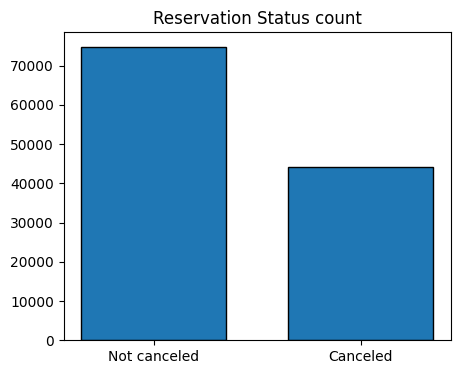

In [44]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4)),1
plt.title('Reservation Status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()



*The graph indicates the percentage of reservations that were canceled versus those that were not. 
Notably, 37% of reservations have been canceled, exerting a considerable impact on the hotel's overall revenue*.

## Reservation Status in Different Hotels (City vs. Resort)

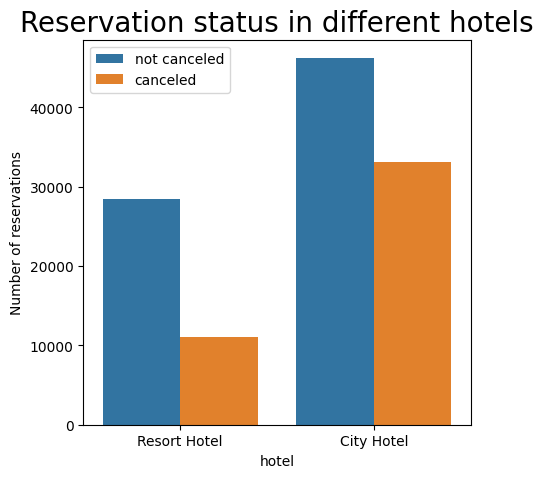

In [45]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='hotel', hue='is_canceled',data=df)
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()


*The bar graph provides a comparative view of reservation status between City Hotels and Resort Hotels. City Hotels exhibit a higher booking rate compared to Resort Hotels, suggesting potential cost-related factors.*

## Average Daily Rate in City and Resort Hotels Over Time

In [46]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [47]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [48]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()


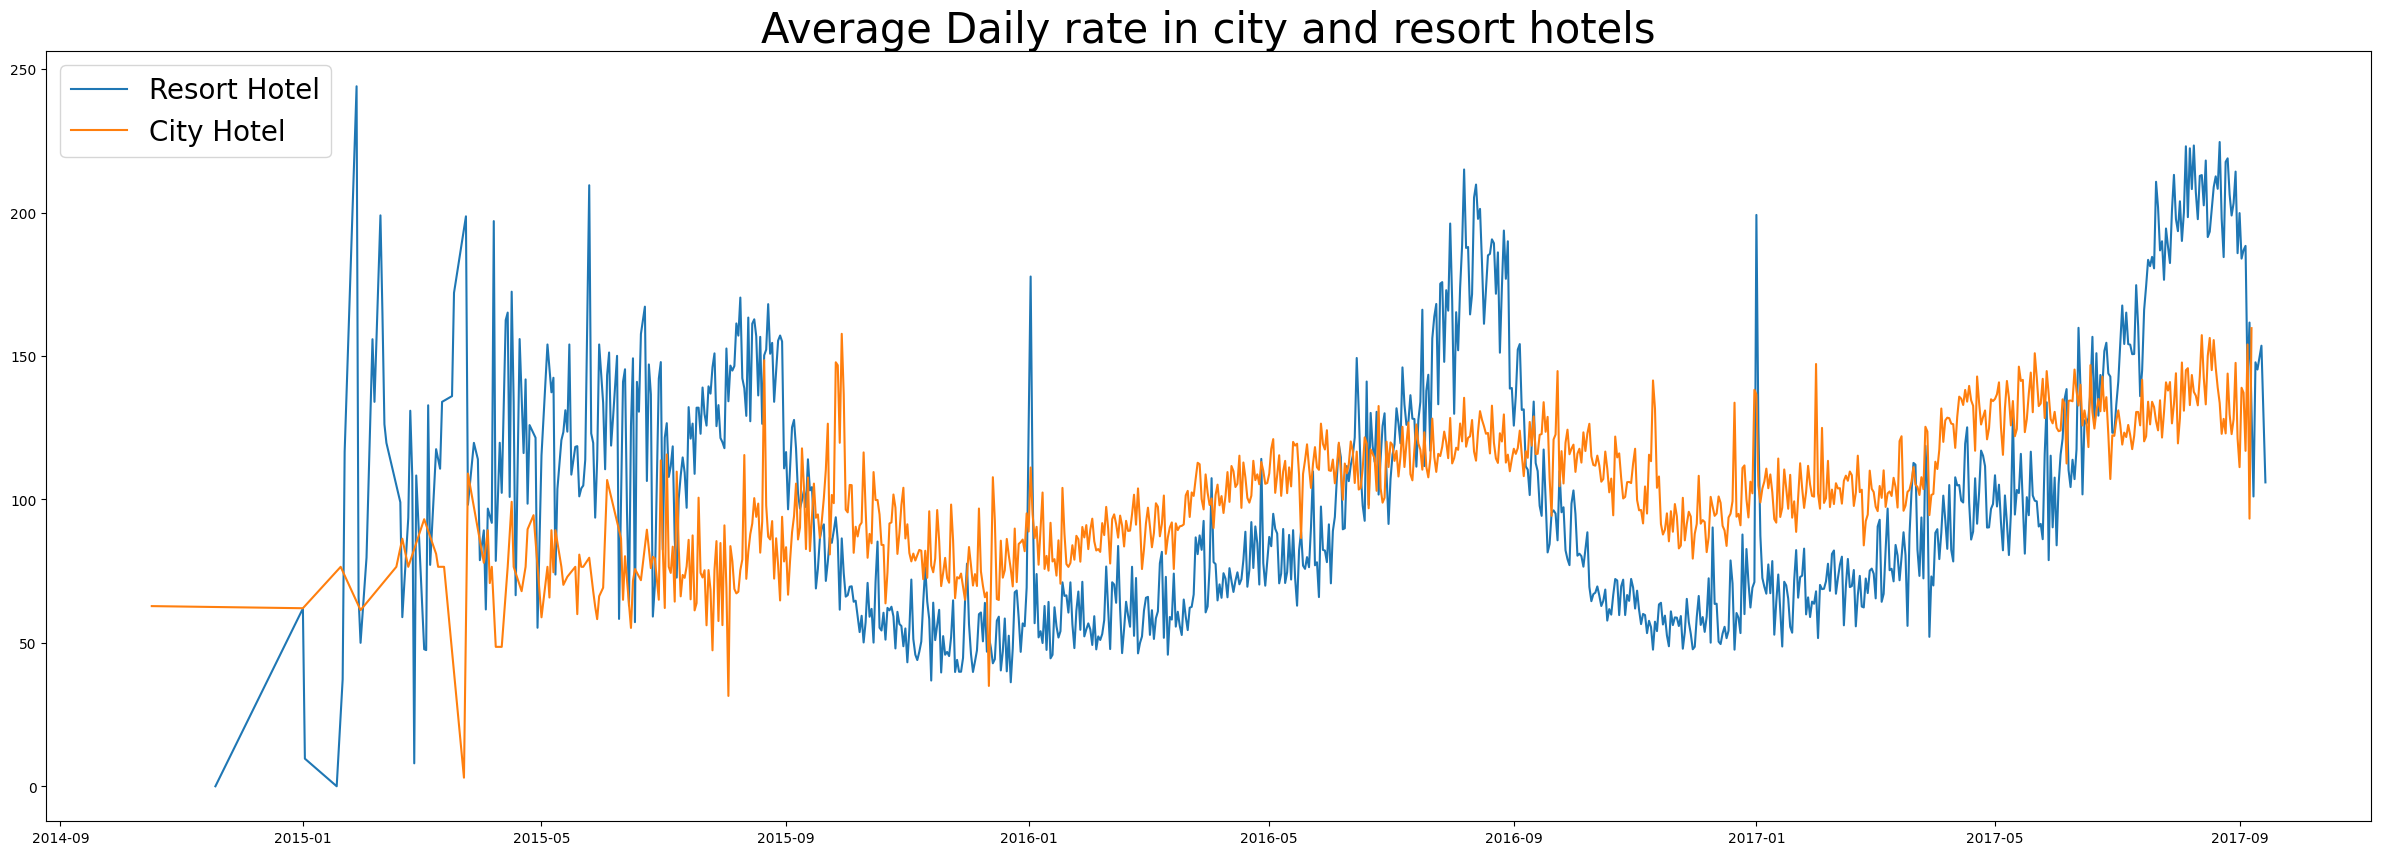

In [49]:
plt.figure(figsize=(30,10))
plt.title('Average Daily rate in city and resort hotels',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

*The line graph illustrates the fluctuation in the average daily rate for City and Resort hotels over time.
On specific days, especially weekends and holidays, City Hotels offer lower average daily rates than Resort Hotels*.

## Reservation Status per Month

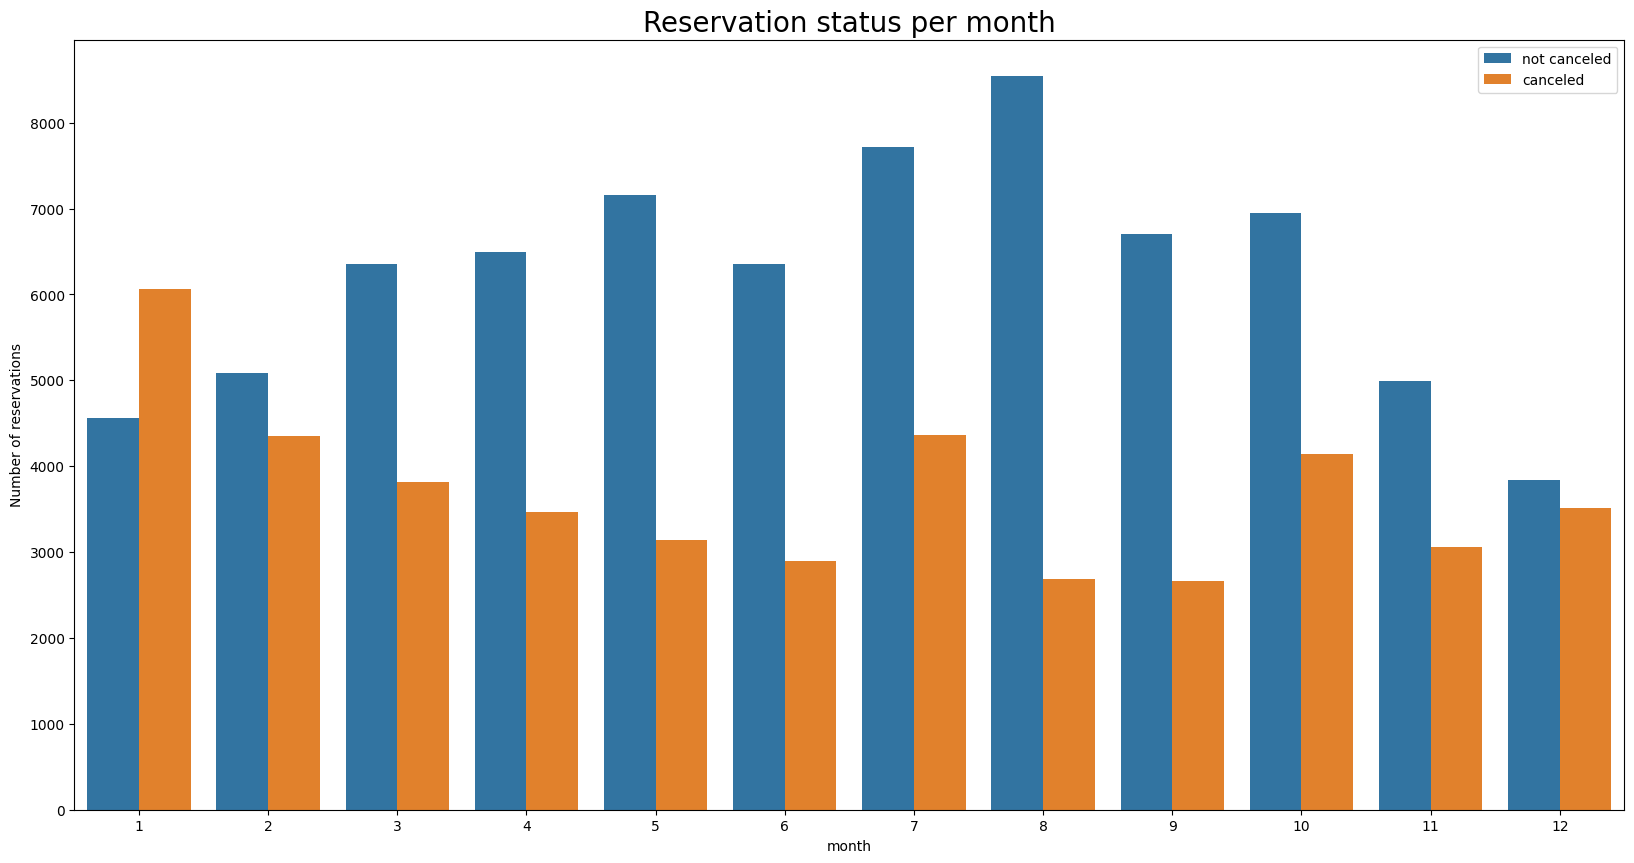

In [50]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20,10))
ax=sns.countplot(x='month',hue='is_canceled',data=df)
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

*A bar graph categorizes the number of reservations by month, distinguishing between confirmed and canceled reservations.
August stands out with the highest overall reservations, while January experiences the peak in cancellations.*

## Average Daily Rate per Month for Canceled Reservations

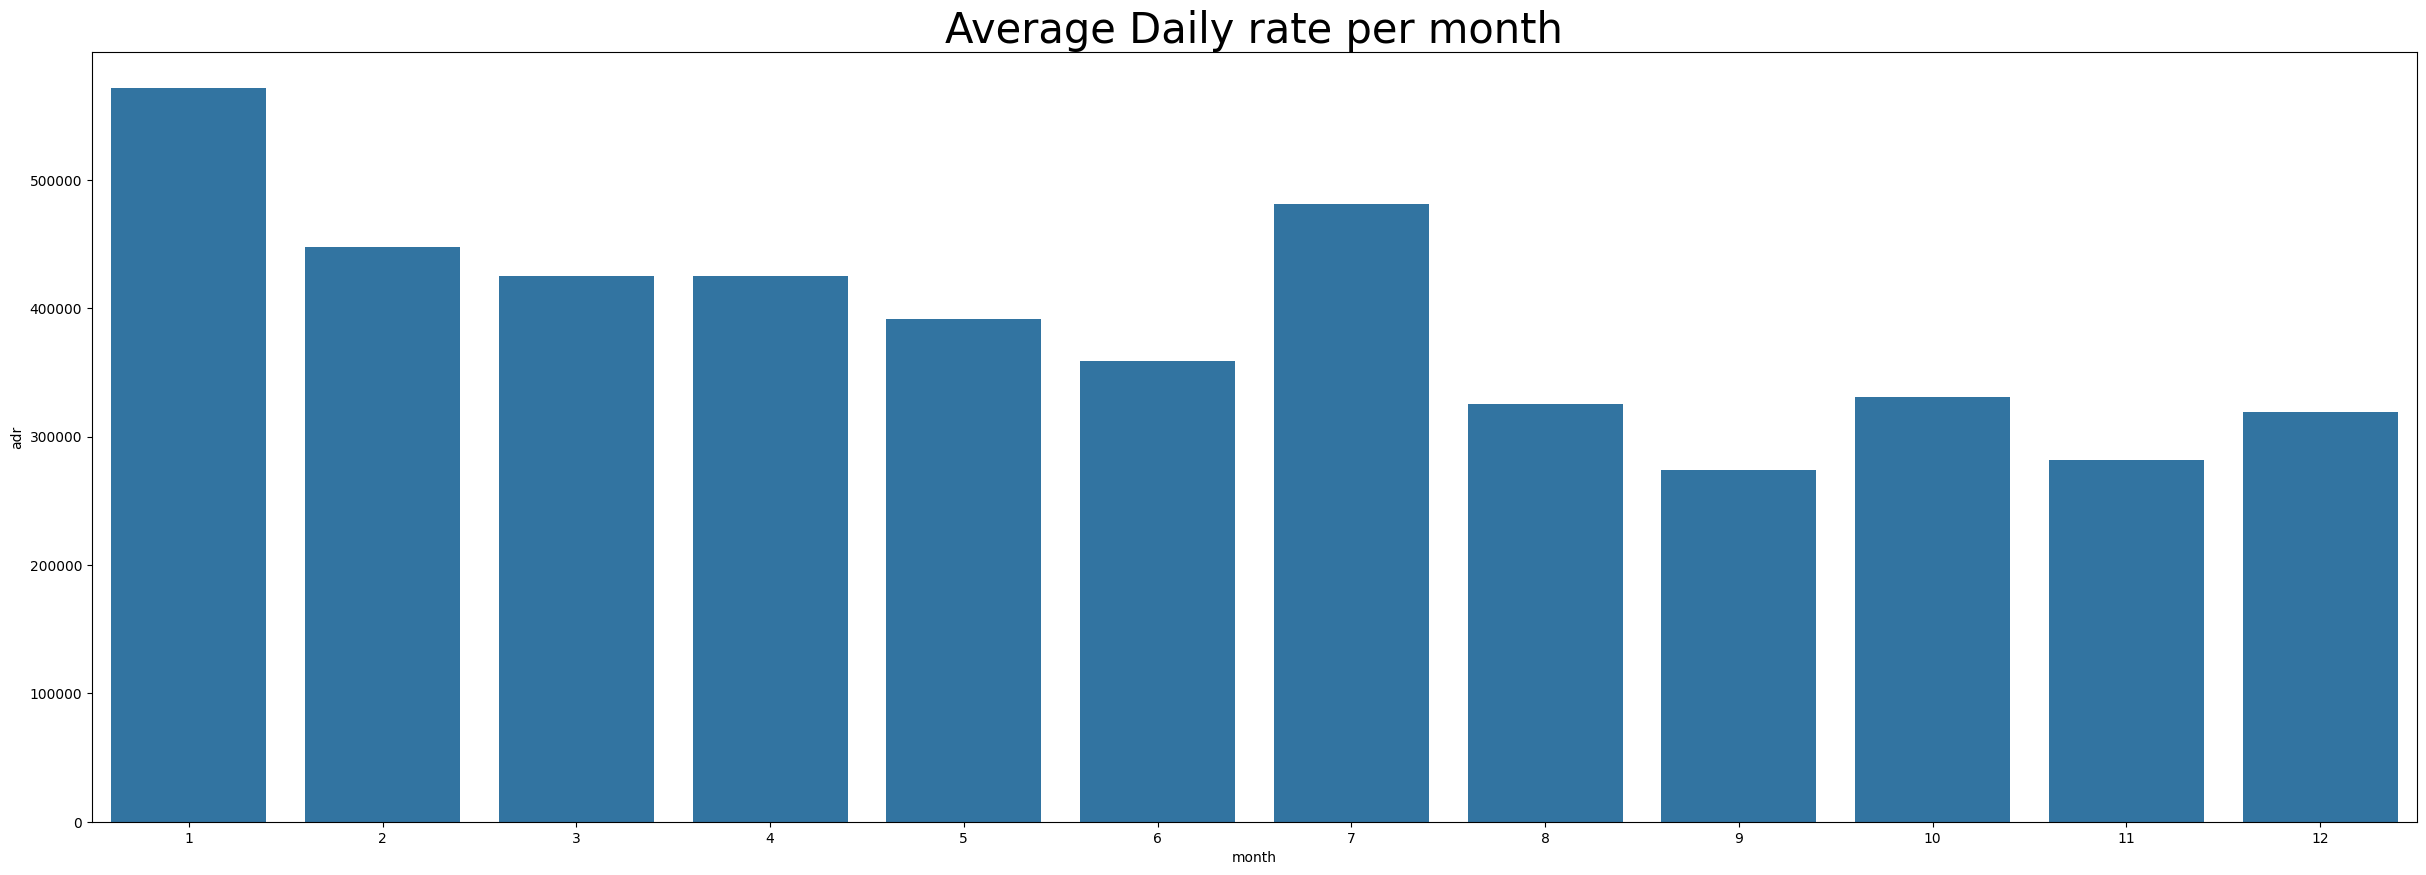

In [51]:
plt.figure(figsize=(30, 10))
plt.title('Average Daily rate per month', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()


*The bar graph highlights the average daily rate per month for canceled reservations.
Higher cancellation rates align with months when the average daily rate is elevated*.

## Top 10 Countries with Reservations Canceled (Pie Chart)

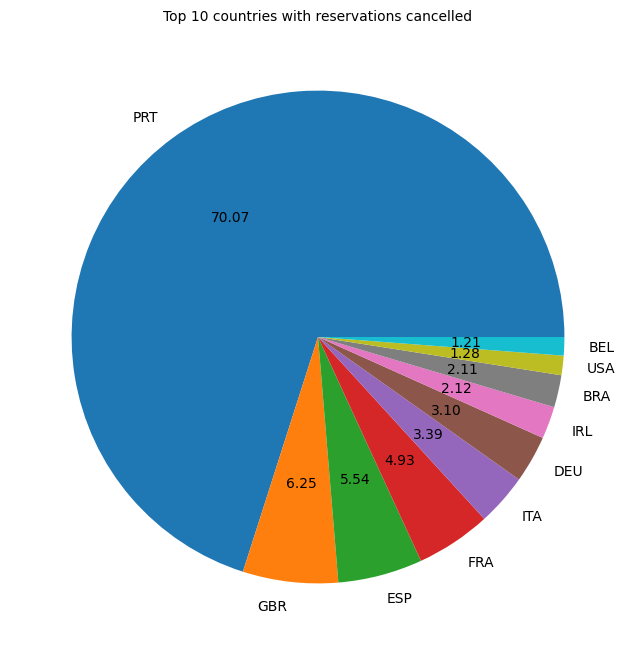

In [52]:
canceled_data = df[df['is_canceled'] == 1]
top_ten_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(10, 8))
plt.title('Top 10 countries with reservations cancelled', fontsize=10)
plt.pie(top_ten_country, autopct='%.2f', labels=top_ten_country.index)
plt.show()


*The pie chart showcases the distribution of canceled reservations among the top 10 countries.
Portugal emerges as the leading country with the highest number of canceled reservations*.

## Market Segment Analysis 

In [53]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [54]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [55]:
canceled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

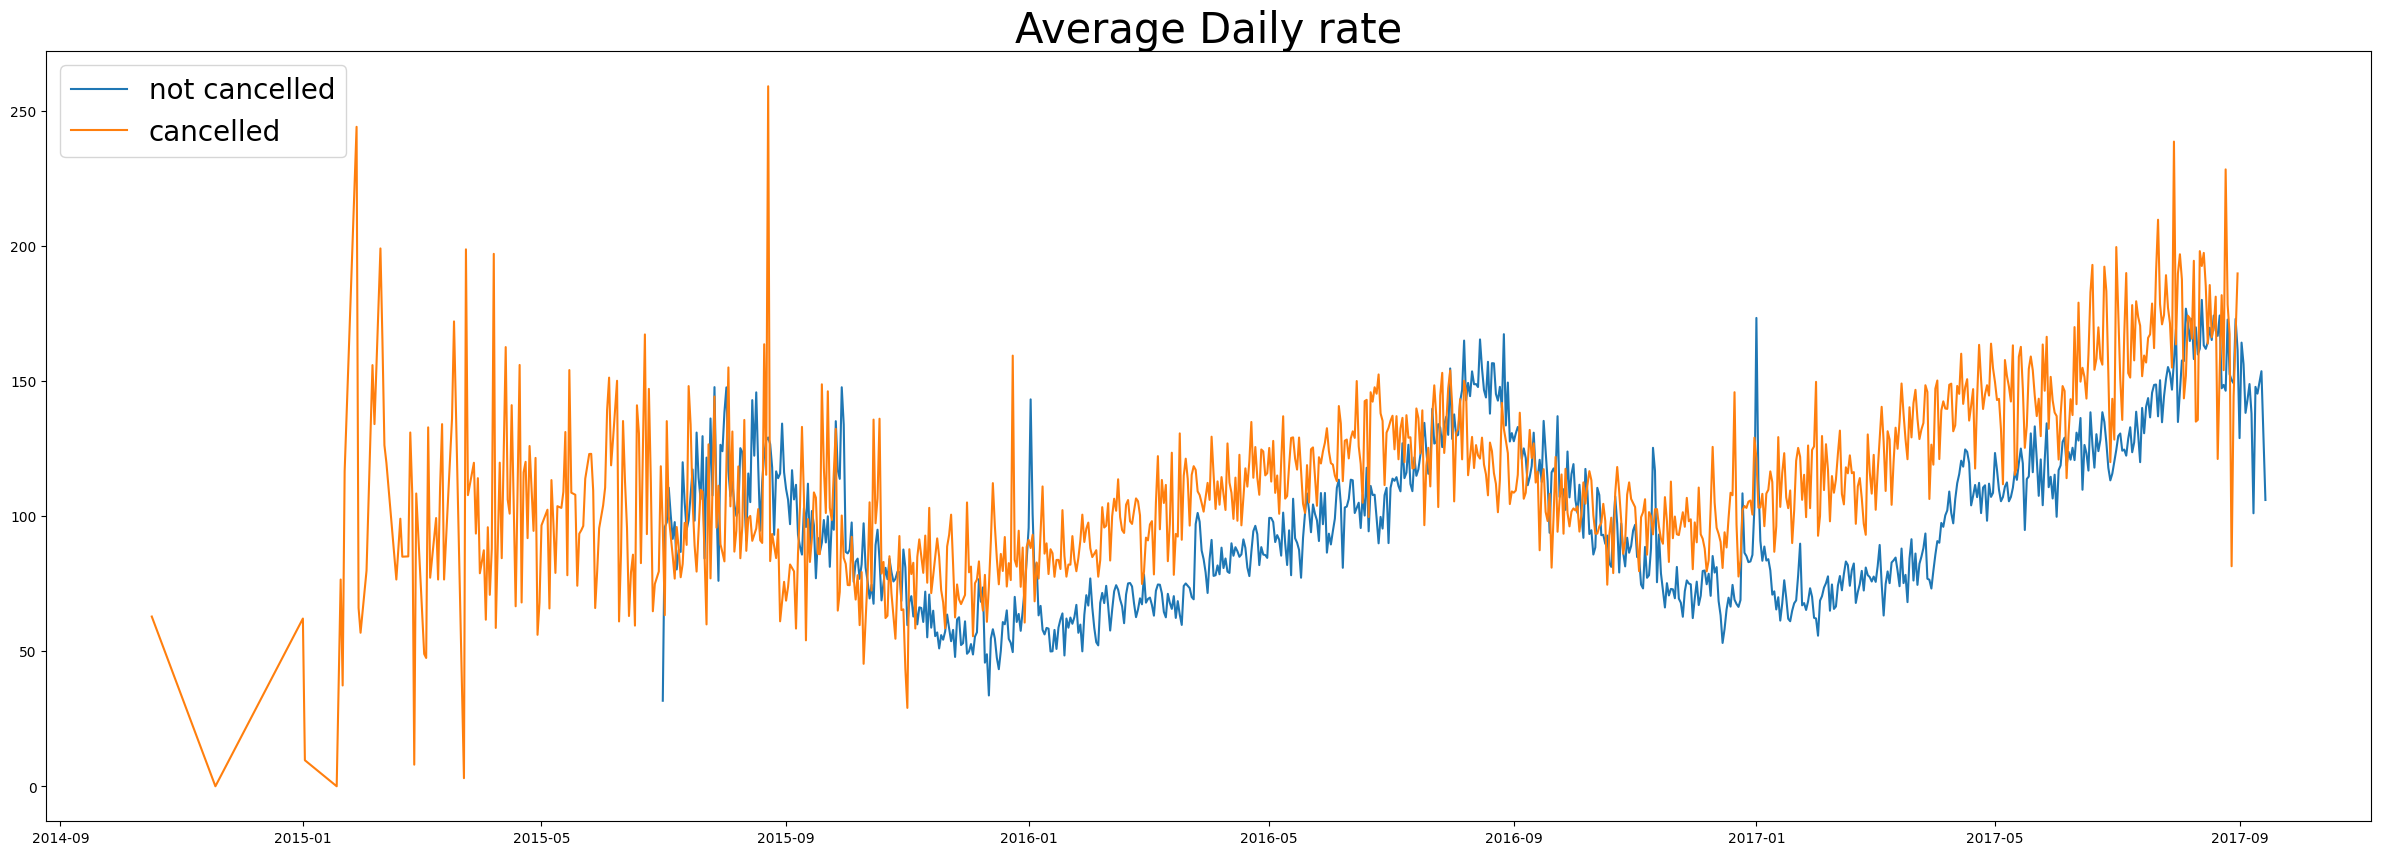

In [56]:
cancelled_df_adr=canceled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=df[df['is_canceled'] == 0]
not_cancelled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(30,10))
plt.title('Average Daily rate',fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend(fontsize=20)


*The bar graph breaks down reservations based on market segments, such as online travel agencies, groups, and direct bookings.
Approximately 46% of clients prefer online travel agencies, while only 4% opt for direct hotel bookings.*

## Cancellation Rate by Average Daily Rate (ADR)

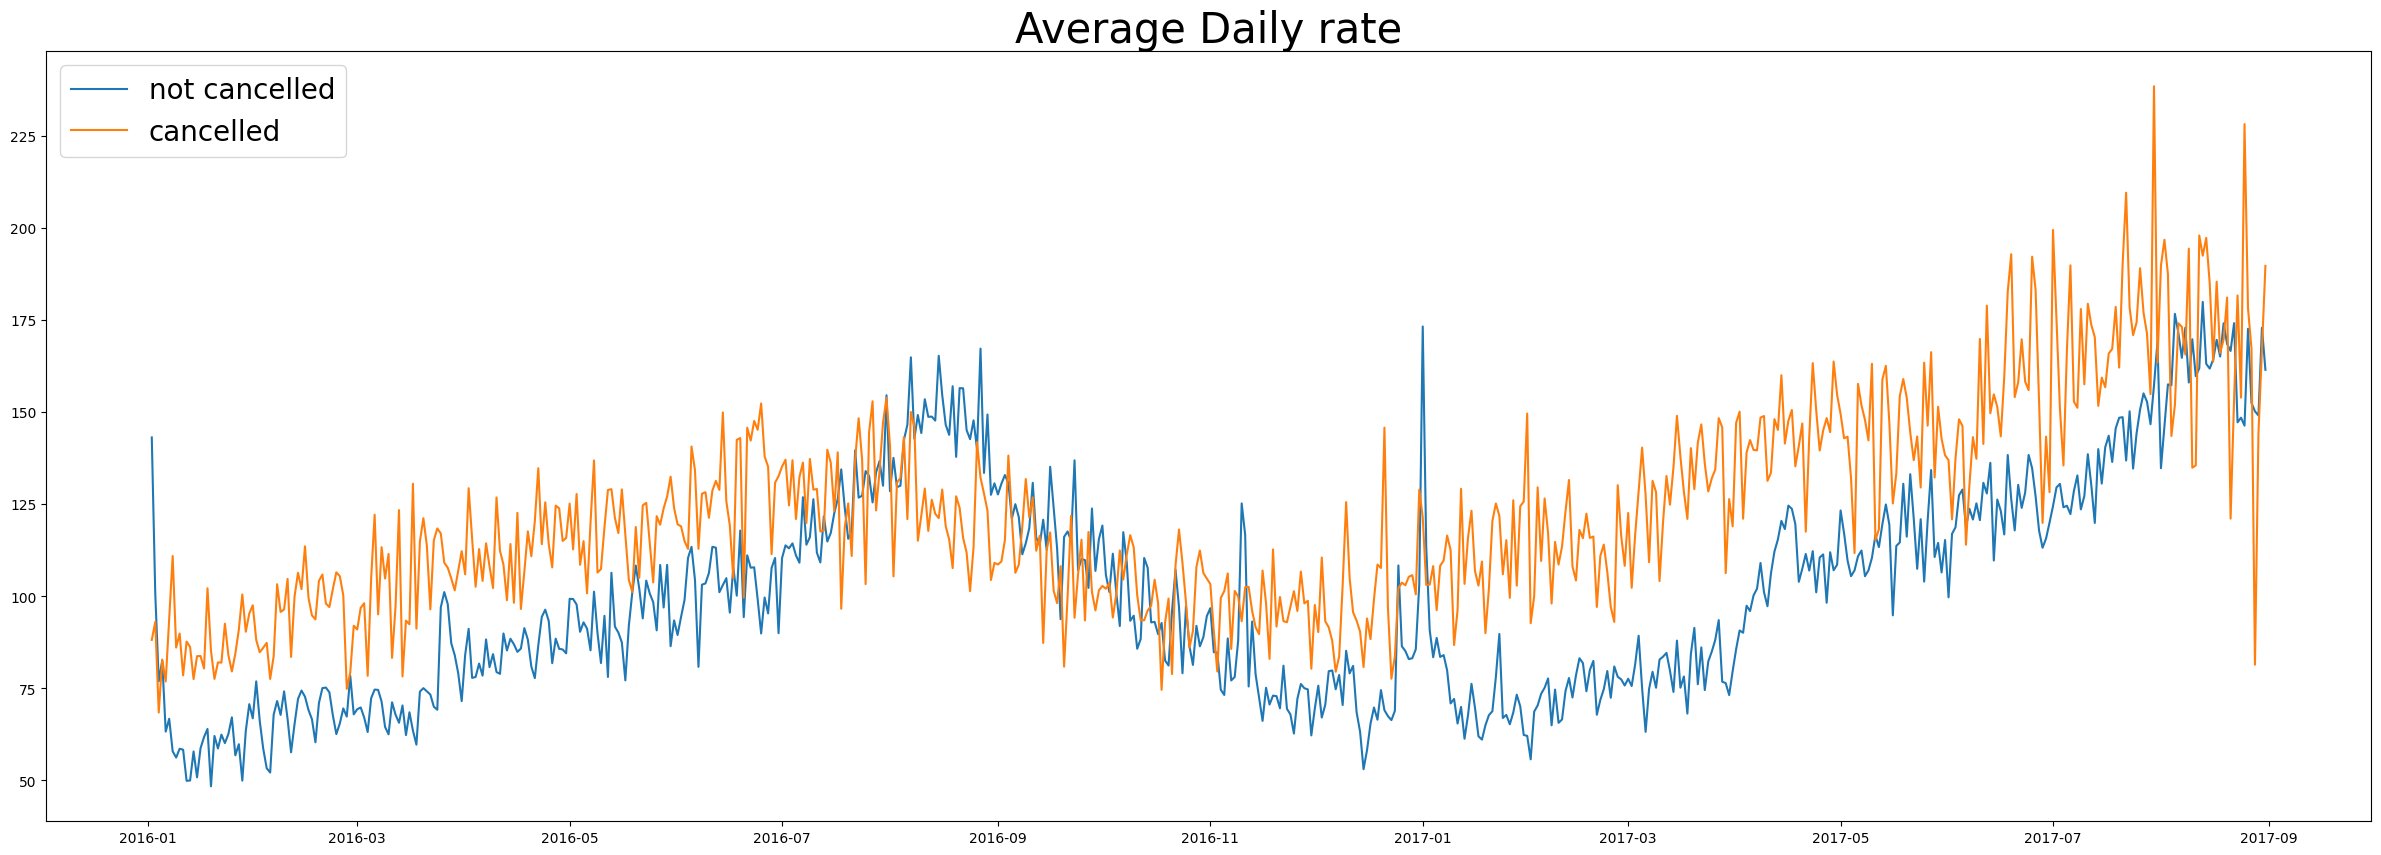

In [58]:
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')&(cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')&(not_cancelled_df_adr['reservation_status_date']<'2017-09')]

plt.figure(figsize=(30,10))
plt.title('Average Daily rate',fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend(fontsize=20)
plt.show()

*The line graph depicts how cancellation rates correlate with variations in average daily rates.
Cancellations are more prevalent when the average daily rate is higher*.

## Conclusion and Suggestions:

### Pricing Strategy:
Develop pricing strategies that involve discounts and reduced rates for specific periods or locations to mitigate cancellation rates.
### Weekend and Holiday Discounts:
Implement reasonable discounts during weekends or holidays, particularly for Resort Hotels, to encourage reservations and minimize cancellations.
### Targeted Marketing:
Identify peak cancellation months, such as January, and implement targeted marketing campaigns to attract customers during these periods.
### Quality Improvement:
Enhance the overall quality of services, with a specific focus on locations like Portugal, to foster customer satisfaction and reduce cancellation rates.
### Direct Booking Promotion:
Encourage direct bookings by offering incentives or promotions, aiming to increase the percentage of clients booking directly with the hotel.